# Import the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

df = pd.read_csv('data/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [2]:
# 21,597 entires with null values in the waterfront, view, and yr_renovated columns.

In [3]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


---

# Exploratory Data Analysis

In [4]:
# Remove rows from the sqft_basement column with a '?' entry (this removes 454 rows)
df = df[df.sqft_basement != '?']

# Convert the sqft_basement column to an int data type, need to convert to float first
df.sqft_basement = df.sqft_basement.astype(float).astype(int)

# Drop rows in the waterfront column with NAN entries
df.dropna(subset = ['waterfront'], inplace = True)

In [5]:
# Create a dataframe for variables used for the model

# Drop irrelevant columns
# id
# date
# view
# lat/long 
# sqft_living15/sqft_lot15' 
df.drop(columns=['id', 'date', 'view', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace = True)

# Create a living_density column that compares the living area to the lot area
df['density'] = df.sqft_living / df.sqft_lot

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400,1951,1991.0,98125,0.354874
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0,1933,NaN,98028,0.077000
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910,1965,0.0,98136,0.392000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0,1987,0.0,98074,0.207921
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530,2001,0.0,98053,0.053174


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18804 entries, 1 to 21596
Data columns (total 15 columns):
price            18804 non-null float64
bedrooms         18804 non-null int64
bathrooms        18804 non-null float64
sqft_living      18804 non-null int64
sqft_lot         18804 non-null int64
floors           18804 non-null float64
waterfront       18804 non-null float64
condition        18804 non-null int64
grade            18804 non-null int64
sqft_above       18804 non-null int64
sqft_basement    18804 non-null int64
yr_built         18804 non-null int64
yr_renovated     15474 non-null float64
zipcode          18804 non-null int64
density          18804 non-null float64
dtypes: float64(6), int64(9)
memory usage: 2.3 MB


In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density
count,1.880400e+04,18804.000000,18804.000000,18804.000000,1.880400e+04,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,15474.000000,18804.000000,18804.000000
mean,5.418399e+05,3.374388,2.117541,2083.155499,1.509805e+04,1.494522,0.007552,3.410019,7.661615,1791.997713,291.157786,1971.068868,81.657684,98077.631780,0.323421
std,3.730331e+05,0.927297,0.769623,923.070881,4.102504e+04,0.539777,0.086573,0.650183,1.177350,832.378323,442.758076,29.320879,395.416206,53.481088,0.269304
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,0.000610
25%,3.215000e+05,3.000000,1.750000,1430.000000,5.048000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,0.156290
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.629500e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,0.247225
75%,6.436125e+05,4.000000,2.500000,2550.000000,1.072075e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,0.405794
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,4.653846


### Checking for Outliers

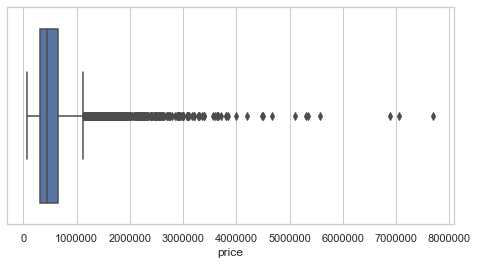

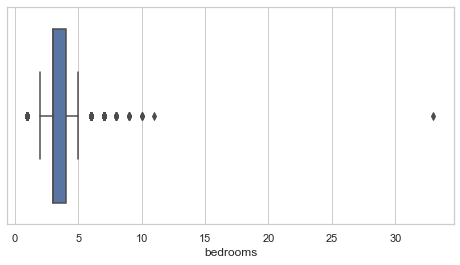

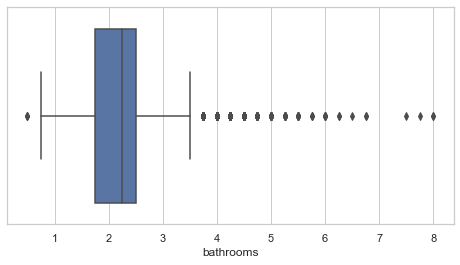

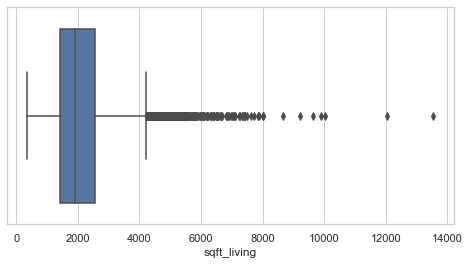

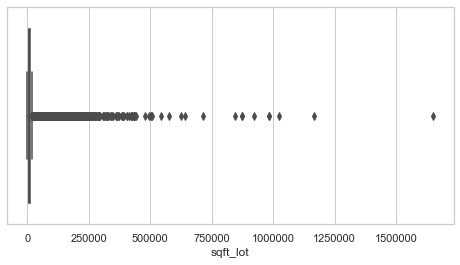

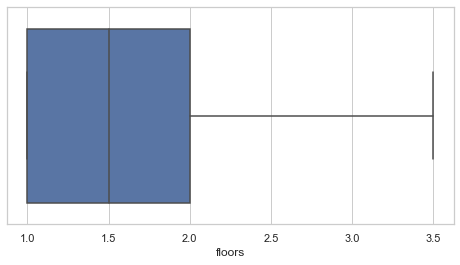

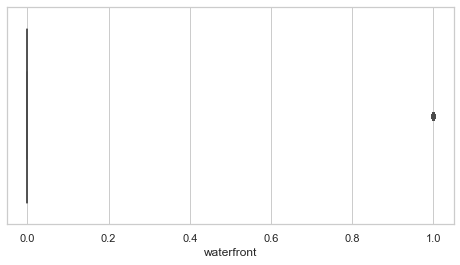

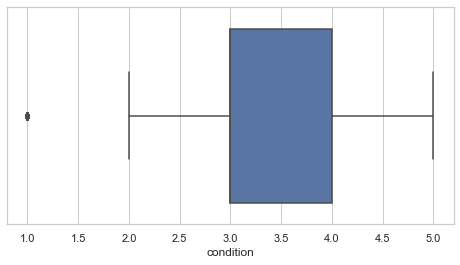

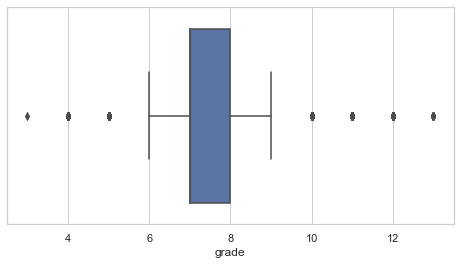

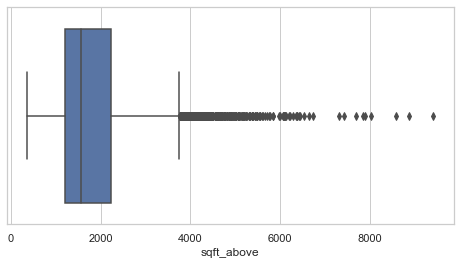

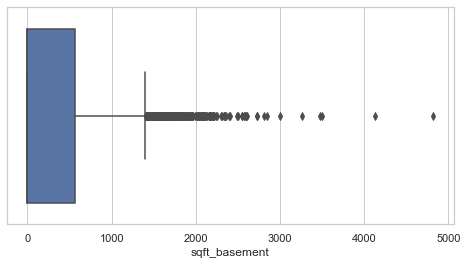

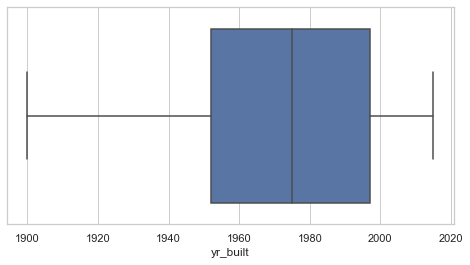

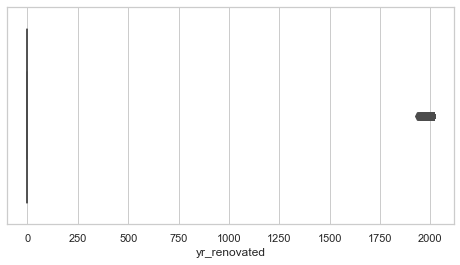

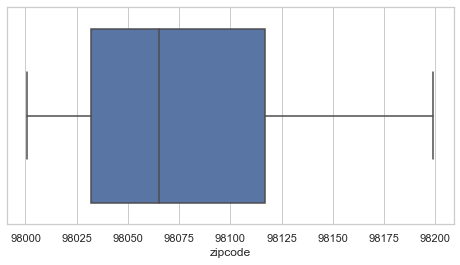

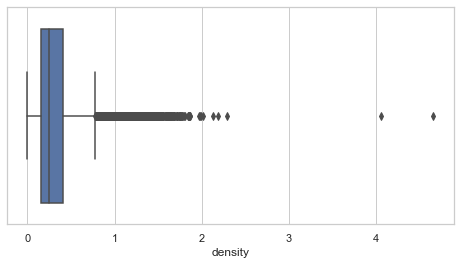

In [8]:
columns = df.columns

sns.set(style='whitegrid')

for column in columns:
    fig, ax = plt.subplots(figsize=(8,4))
    sns.boxplot(df[column])

#### Bedrooms has an outlier. One house has over 30 bedrooms. Because this is so unusual, we decided to eliminate it. 

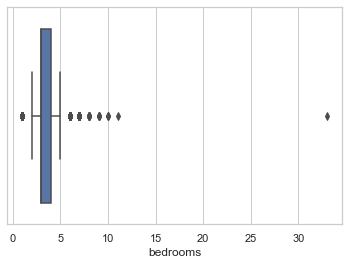

In [9]:
sns.set(style='whitegrid')
sns.boxplot(df['bedrooms'])

In [10]:
#locating the row of the bedroom outlier
df.loc[df['bedrooms']>30]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density
15856,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1040,580,1947,0.0,98103,0.27


In [11]:
#dropping the row of the bedroom outlier
df.drop(index = 15856, inplace=True)

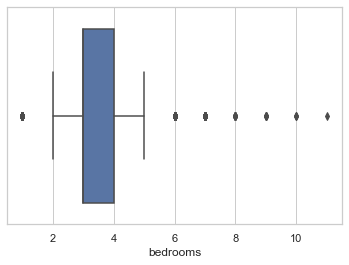

In [12]:
#replotting a box plot
sns.set(style='whitegrid')
sns.boxplot(df['bedrooms']);

#### sqft_lot has an outlier. 

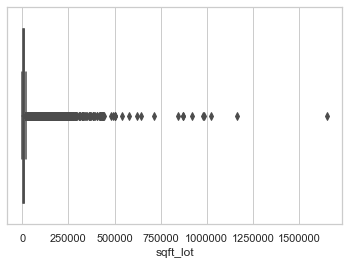

In [13]:
sns.boxplot(df['sqft_lot']);

In [14]:
max(df['sqft_lot'])

1651359

In [15]:
df.loc[df['sqft_lot']>1000000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density
1717,700000.0,4,1.0,1300,1651359,1.0,0.0,4,6,1300,0,1920,0.0,98022,0.000787
7762,855000.0,4,3.5,4030,1024068,2.0,0.0,3,10,4030,0,2006,0.0,98045,0.003935
17305,190000.0,2,1.0,710,1164794,1.0,0.0,2,5,710,0,1915,0.0,98014,0.000610


##### Checking latitude and longitude of largest lot

In [16]:
df.loc[df['sqft_lot']>1500000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density
1717,700000.0,4,1.0,1300,1651359,1.0,0.0,4,6,1300,0,1920,0.0,98022,0.000787


Checked on google maps. This is a farm with a farm house. The latitude, longitude, and sf lot (equivalent to 37 acres) are accurate. Decided to keep. 

---

## Determine Colinearity

Text(0.5, 1.0, 'Graphical Colinearity Test')

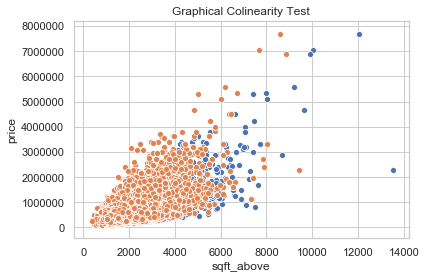

In [17]:
import seaborn as sns
sns.scatterplot(x=df['sqft_living'], y=df['price'], legend='full').set_title('Living Space Per Sales Price')

import seaborn as sns
sns.scatterplot(x=df['sqft_above'], y=df['price']).set_title('Graphical Colinearity Test')

#df.plot.scatter(x='sqft_living', y='price')

Text(0.5, 1.0, 'Bathrooms Versus Price')

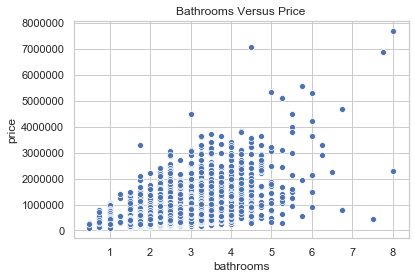

In [18]:
import seaborn as sns
sns.scatterplot(x=df['bathrooms'], y=df['price']).set_title('Bathrooms Versus Price')

Conclusion: sqft_above and sqft_living are colinear. Remove sqft_above.

In [19]:
#correlation matrix
df_ind = df.drop(columns = 'price')
df_corr = df_ind.corr()
df_corr.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density
bedrooms,1.000000,0.530981,0.594891,0.030583,0.190085,0.000041,0.020626,0.371227,0.495239,0.309213,0.164936,0.019164,-0.155948,0.031102
bathrooms,0.530981,1.000000,0.755768,0.085007,0.508007,0.068291,-0.127895,0.667539,0.687759,0.282684,0.508486,0.047146,-0.202068,0.287252
sqft_living,0.594891,0.755768,1.000000,0.172985,0.358311,0.111725,-0.059165,0.764472,0.877784,0.434627,0.319131,0.048497,-0.195899,0.077913


- correlations take a value between -1 and 1, -1 being a perfectly negative linear relationship, and +1 a perfectly positive linear relationship.

In [20]:
df_corr = df_corr.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

df_corr.set_index(['pairs'], inplace=True)

df_corr.drop(columns=['level_1', 'level_0'], inplace=True)

df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

df_corr

,cc
pairs,
"(bedrooms, bedrooms)",1.000000
"(grade, sqft_above)",0.945977
"(sqft_living, sqft_above)",0.924974
"(sqft_living, grade)",0.919823
"(grade, bathrooms)",0.919236
...,...
"(waterfront, condition)",0.026929
"(sqft_living, density)",0.020489
"(zipcode, waterfront)",0.018028


In [21]:
#this would be high correlation
df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

,cc
pairs,
"(grade, sqft_above)",0.945977
"(sqft_living, sqft_above)",0.924974
"(sqft_living, grade)",0.919823
"(grade, bathrooms)",0.919236
"(sqft_living, bathrooms)",0.912745
"(bathrooms, sqft_above)",0.902962
"(bedrooms, sqft_living)",0.820150
"(floors, yr_built)",0.806781
"(yr_built, bathrooms)",0.776215


#### We chose to remove sqft_above, grade, and yr_built due to being highly correlated.

In [22]:
df.drop(columns = ['sqft_above', 'grade', 'yr_built'], inplace = True)

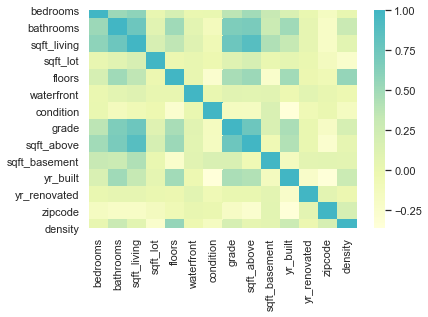

In [23]:
# correlation heat map
sns.heatmap(df_ind.corr(), center=1, cmap='YlGnBu');

The heatmap confirms that sqft_living, sqft_above, and bathrooms are correlated. So we should remove 2 of 3 variables.

### Use Dummy Variables for Categorical Variables

#### Identifying Categorical Variables

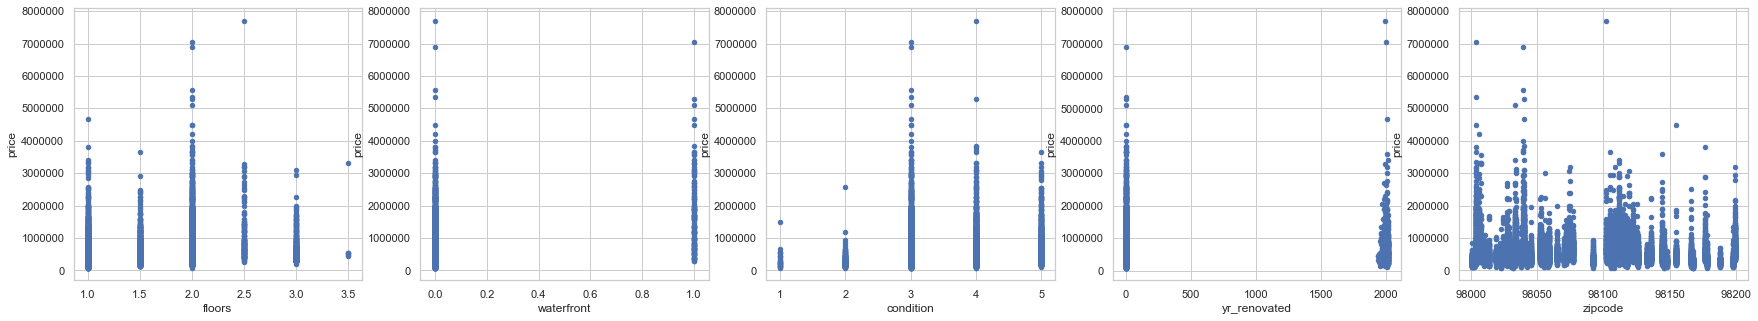

In [24]:
# visualize categorical variables with scatter plots
categorical = df[['floors', 'waterfront', 'condition', 'yr_renovated', 'zipcode', 'price']]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30,5))

for xcol, ax in zip(['floors', 'waterfront', 'condition', 'yr_renovated', 'zipcode'], axes):
    categorical.plot(kind='scatter', x=xcol, y='price', ax=ax, color='b')

In [25]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_basement,yr_renovated,zipcode,density
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,400,1991.0,98125,0.354874
2,180000.0,2,1.00,770,10000,1.0,0.0,3,0,NaN,98028,0.077000
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,910,0.0,98136,0.392000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,0,0.0,98074,0.207921
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,1530,0.0,98053,0.053174


In [26]:
# Create new columns to simplify categorical variables

# condition: >= 3 is 'Good', < 3 is 'Poor'
df['condition_cat'] = np.where(df.condition >= 3, 'Good', 'Poor')

# yr_renovated: 0 is 'Not Renovated', < 2000 is 'Prior to 2000', >= 2000 is '2000 to Present'
df['renovated_cat'] = np.where(df.yr_renovated >= 2000, 'Recently_Renovated', (np.where((df.yr_renovated < 2000) 
                    & (df.yr_renovated > 0), 'Prior_to_2000', 'Not_Renovated')))

# The zipcodes for "urban" are the zip codes found in Seattle, WA
urban = [98177, 98117, 98107, 98199, 98119, 98109, 98103, 98133, 98125, 98155, 98115,
         98105, 98112, 98102, 98122, 98144, 98108, 98118, 98116, 98121, 98101, 98154, 
         98104, 98134, 98106, 98126, 98136, 98146, 98168, 98178]

df['zipcode_cat'] = ['urban' if x in urban else 'rural' for x in df['zipcode']]

# density binning
df['density_cat'] = np.where(df.density >= 3, 'high_density',
                             (np.where((df.density < 3) & (df.density >= 1),
                                       'mid_density', 'low_density')))

# bedrooms binning
df['bed_cat'] = np.where(df.bedrooms >= 4, 'beds_4+', 
                            (np.where((df.bedrooms >= 3) & (df.bedrooms < 4), 'beds_3',
                         (np.where((df.bedrooms >= 2) & (df.bedrooms < 3), 'beds_2', 'beds_1')))))

In [27]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_basement,yr_renovated,zipcode,density,condition_cat,renovated_cat,zipcode_cat,density_cat,bed_cat
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,400,1991.0,98125,0.354874,Good,Prior_to_2000,urban,low_density,beds_3
2,180000.0,2,1.00,770,10000,1.0,0.0,3,0,NaN,98028,0.077000,Good,Not_Renovated,rural,low_density,beds_2
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,910,0.0,98136,0.392000,Good,Not_Renovated,urban,low_density,beds_4+
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,0,0.0,98074,0.207921,Good,Not_Renovated,rural,low_density,beds_3
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,1530,0.0,98053,0.053174,Good,Not_Renovated,rural,low_density,beds_4+


## Prepare the data for the Regression Model

Log transformation and standardization were explored as methods to reduce heteroscedasticity in the residual plot, however neither yielded an improvement in model accuracy, so they were not used. 

#### One-Hot Encoding of Dummy Variables

In [28]:
df_num = df.drop("price", axis=1) # drop labels for training set
y = df["price"].copy()

In [29]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median");

In [30]:
df_num = df_num.drop(columns = ['bedrooms', 'condition', 'yr_renovated', 'zipcode', 'density', 
                                'condition_cat', 'renovated_cat', 'zipcode_cat', 'density_cat', 'bed_cat'], axis=1)

In [31]:
imputer.fit(df_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [32]:
X = imputer.transform(df_num)

In [33]:
condition_cat = df[['condition_cat']]
renovated_cat = df[['renovated_cat']]
zipcode_cat = df[['zipcode_cat']]
density_cat = df[['density_cat']]
bed_cat = df[['bed_cat']]

In [34]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20
    
cat_encoder = OneHotEncoder()

In [35]:
condition_cat_1hot = cat_encoder.fit_transform(condition_cat)
condition_cats = cat_encoder.categories_[0].tolist()

renovated_cat_1hot = cat_encoder.fit_transform(renovated_cat)
renovated_cats = cat_encoder.categories_[0].tolist()

zipcode_cat_1hot = cat_encoder.fit_transform(zipcode_cat)
zipcode_cats = cat_encoder.categories_[0].tolist()

density_cat_1hot = cat_encoder.fit_transform(density_cat)
density_cats = cat_encoder.categories_[0].tolist()

bed_cat_1hot = cat_encoder.fit_transform(bed_cat)
bed_cats = cat_encoder.categories_[0].tolist()

In [36]:
# X represents all of the independent variables 
X = np.c_[(X, condition_cat_1hot.toarray(), renovated_cat_1hot.toarray(), zipcode_cat_1hot.toarray(), density_cat_1hot.toarray(), bed_cat_1hot.toarray())]

In [37]:
#making a list of columns
cols = df_num.columns.tolist() + condition_cats + renovated_cats + zipcode_cats + density_cats + bed_cats

df_price = df[['price']].copy()
df = pd.DataFrame(X, columns = cols, index = df.index)
df = pd.concat([df_price, df], axis=1)
df.head()

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,Good,Poor,Not_Renovated,...,Recently_Renovated,rural,urban,high_density,low_density,mid_density,beds_1,beds_2,beds_3,beds_4+
1,538000.0,2.25,2570.0,7242.0,2.0,0.0,400.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,180000.0,1.00,770.0,10000.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,604000.0,3.00,1960.0,5000.0,1.0,0.0,910.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,510000.0,2.00,1680.0,8080.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1230000.0,4.50,5420.0,101930.0,1.0,0.0,1530.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


---

## Create models and determine which is best

### Cross Validation

In [38]:
# Creating subset of test data and training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=12)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [39]:
#verifying the number of observations in each group
print(len(X_train), len(X_test), len(y_train), len(y_test))

15042 3761 15042 3761


### Creating Model Using Sklearn Linear Regression

In [40]:
# Creating the model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression() #instantiate
linreg.fit(X_train, y_train)

y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [41]:
r_sq = linreg.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', linreg.intercept_)
print('slope:', linreg.coef_)

coefficient of determination: 0.6006904846963075
intercept: 78466.46746933821
slope: [ 0.00000000e+00  1.78296030e+04  3.39913874e+02 -2.95266990e-01
 -4.49739263e+04  8.51943754e+05 -6.64219966e+01  1.80833910e+04
 -1.80833910e+04 -6.57874741e+04 -2.24741563e+04  8.82616303e+04
 -7.81199495e+04  7.81199495e+04  1.30002379e+05 -9.45858455e+04
 -3.54165335e+04  7.00357561e+04  4.51033214e+04 -2.42240171e+04
 -9.09150603e+04]


In [42]:
# getting residuals
train_residuals = y_pred_train - y_train
test_residuals = y_pred_test - y_test

In [43]:
# Determine MSE
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 56088954314.40393
Test Mean Squared Error: 57553471570.40009


In [44]:
print(round(test_mse/train_mse,3))

1.026


The test MSE is a higher than the train MSE, but only by 3.9%.

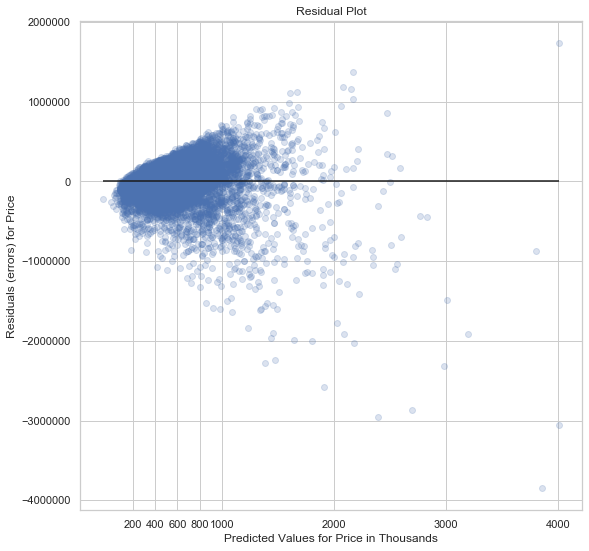

In [45]:
plt.figure(figsize=(9,9))
plt.scatter(y_pred_train, train_residuals, alpha=0.2)
plt.hlines(y = 0, xmin = y_pred_train.min(), xmax = y_pred_train.max())
plt.title('Residual Plot')
plt.xlabel('Predicted Values for Price in Thousands')
plt.ylabel('Residuals (errors) for Price')
plt.xticks((200000, 400000, 600000, 800000, 1000000, 2000000, 3000000, 4000000), ('200', '400', '600', '800', '1000', '2000', '3000', '4000'))
plt.show()

The residual plot shows heteroscedasticity. This shows that the model could be improved.

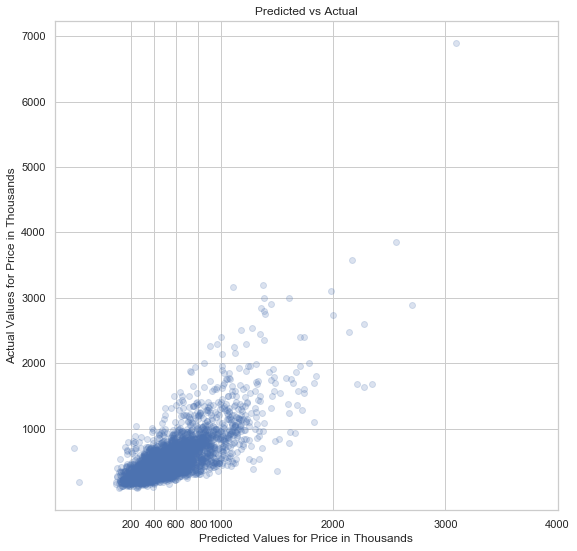

In [46]:
plt.figure(figsize=(9,9))
plt.scatter(y_pred_test, y_test, alpha=0.2)
# plt.hlines(y = 0, xmin = y_pred_test.min(), xmax = y_pred_test.max())
plt.title('Predicted vs Actual')
plt.xlabel('Predicted Values for Price in Thousands')
plt.ylabel('Actual Values for Price in Thousands')
plt.xticks((200000, 400000, 600000, 800000, 1000000, 2000000, 3000000, 4000000), ('200', '400', '600', '800', '1000', '2000', '3000', '4000'))
plt.yticks((1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000), ('1000', '2000', '3000', '4000', '5000', '6000', '7000'))
plt.show()

In [47]:
const = list(['intercept'])
cols = const + cols
cols

['intercept',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'sqft_basement',
 'Good',
 'Poor',
 'Not_Renovated',
 'Prior_to_2000',
 'Recently_Renovated',
 'rural',
 'urban',
 'high_density',
 'low_density',
 'mid_density',
 'beds_1',
 'beds_2',
 'beds_3',
 'beds_4+']

### Creating Model using OLS

In [48]:
model = sm.OLS(y_train, X_train)
model.exog_names[:] = cols
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1507.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):               0.00
Time:                        06:42:50   Log-Likelihood:            -2.0749e+05
No. Observations:               15042   AIC:                         4.150e+05
Df Residuals:                   15026   BIC:                         4.151e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept            2.69e+04   1.99e+04      1.349      0.177   -1.22e+04     6.6e+04
bathrooms           1.783e+04   4348.431      4.100      0.000    9306.148    2.64e+04
sqft_living          339.9139      3.985     85.291      0.000     332.102     347.726
sqft_lot              -0.2953      0.054     -5.515      0.000      -0.400      -0.190
floors             -4.497e+04   5404.083     -8.322      0.000   -5.56e+04   -3.44e+04
waterfront          8.519e+05   2.18e+04     39.001      0.000    8.09e+05    8.95e+05
sqft_basement        -66.4220      6.082    -10.921      0.000     -78.344     -54.500
Good                3.153e+04   1.31e+04      2.415      0.016    5937.973    5.71e+04
Poor               -4631.9965   1.54e+04     -0.301      0.763   -3.48e+04    2.55e+04
Not_Renovated      -5.682e+04   9177.889     -6.191      0.000   -7.48e+04   -3.88e+04
Prior_to_2000      -1.351e+04   1.34e+04     -1.011      0.312   -3.97e+04    1.27e+04
Recently_Renovated  9.723e+04   1.32e+04      7.368      0.000    7.14e+04    1.23e+05
rural              -6.467e+04   1.03e+04     -6.280      0.000   -8.49e+04   -4.45e+04
urban               9.157e+04   1.02e+04      9.020      0.000    7.17e+04    1.11e+05
high_density         1.39e+05   1.18e+05      1.176      0.240   -9.27e+04    3.71e+05
low_density        -8.562e+04   4.97e+04     -1.724      0.085   -1.83e+05    1.17e+04
mid_density        -2.645e+04   5.02e+04     -0.527      0.598   -1.25e+05    7.19e+04
beds_1              7.676e+04   1.69e+04      4.546      0.000    4.37e+04     1.1e+05
beds_2              5.183e+04   8122.058      6.381      0.000    3.59e+04    6.77e+04
beds_3              -1.75e+04   7479.991     -2.339      0.019   -3.22e+04   -2836.626
beds_4+            -8.419e+04   8127.270    -10.359      0.000      -1e+05   -6.83e+04
==============================================================================
Omnibus:                     8574.951   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           250102.481
Skew:                           2.205   Prob(JB):                         0.00
Kurtosis:                      22.483   Cond. No.                     1.46e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Interpreting the Model

Adjusted R-squared is 0.60. This is reasonably acceptable, however, the model could be improved.

In [49]:
#Getting Coefficients
model.params

intercept              26902.788847
bathrooms              17829.603006
sqft_living              339.913874
sqft_lot                  -0.295267
floors                -44973.926264
waterfront            851943.753630
sqft_basement            -66.421997
Good                   31534.785382
Poor                   -4631.996535
Not_Renovated         -56819.877789
Prior_to_2000         -13506.559970
Recently_Renovated     97229.226606
rural                 -64668.555073
urban                  91571.343919
high_density          138969.975342
low_density           -85618.249245
mid_density           -26448.937250
beds_1                 76761.453289
beds_2                 51829.018576
beds_3                -17498.319926
beds_4+               -84189.363092
dtype: float64

### Making Predictions

In [50]:
coefficients = list(model.params)
ict = coefficients[0]
ba = coefficients[1]
sfl = coefficients[2]
sft = coefficients[3]
fl = coefficients[4]
w = coefficients[5]
sfb = coefficients[6]
cg = coefficients[7]
cp = coefficients[8]
nr = coefficients[9]
p2 = coefficients[10]
rr = coefficients[11]
r = coefficients[12]
u = coefficients[13]
hd = coefficients[14]
ld = coefficients[15]
md = coefficients[16]
b1 = coefficients[17]
b2 = coefficients[18]
b3 = coefficients[19]
b4 = coefficients[20]

In [51]:
#creating equation
def predict_price():

    return

## Check Interactions

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#generate interactions
x_interaction = PolynomialFeatures(1, interaction_only=True, include_bias=False).fit_transform(df_train)

In [ ]:
# DO NOT RUN - REFERENCE ONLY

#new dataframe with interaction terms included
int_df = pd.DataFrame(x_interaction, columns = ['bathrooms', 'sqft_living', 'sqft_lot', 'floors',
      'waterfront', 'sqft_basement', 'density', 'Good', 'Poor', 'Flat', 'Hilly', 'Low_Slope', 
        'Steep', 'Not_Renovated', 'Prior_to_2000', 'Recently_Renovated', 'rural', 'urban', 
       'high_density', 'low_density', 'mid_density', 'beds1', 'beds2', 'beds3', 'beds4+',
        
      'bathrooms:sqft_living', 'bathrooms:bedrooms', 'bathrooms:sqft_lot', 'bathrooms:floors'])

In [ ]:
# now make a new model 
int_model = linear_model.OLS(y_train, x_train).fit()

In [ ]:
# get interactions which have a statistically significant pvalue
int_model.pvalues[int_model.pvalues < 0.05]

In [ ]:
model = sm.OLS(y_train, X_train)
model.exog_names[:] = cols
model = model.fit()
model.summary()